# Initial Data loading and experimentation
---

In [15]:
from PIL import Image
import numpy as np
import glob
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing.dummy import Pool as TP
import keras.preprocessing.image
import cv2 as cv
import os
import random
import torch as T
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt

DFP = '/Users/campb/Documents/PersonalProjects/AGRNet/Dataset/Sample-'
img_folder = '/Users/campb/Documents/PersonalProjects/AGRNet/Dataset/'
NS = '/Sample-'

image_format = 'RGB'

imsize = 1024

### - Get image Paths - ###
assert(os.path.exists(DFP + str(1) + ".jpg"))
rawimgf = sorted(glob.glob(DFP + '*.jpg', recursive = True))
### - image names - ###
imnames = [i.split('/')[-1].split("t")[-1][1:] for i in rawimgf]


In [16]:
class ImageDataset(Dataset):
    def __init__(self,img_folder,names, transform):
        self.transform = transform
        self.image_names = names #Predetermined dataset
        self.img_folder=img_folder
        
    def __len__(self):
        return len(self.image_names)
    
    def __getitem__(self,index):
    
        image=cv.imread(self.img_folder+self.image_names[index])
        image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
        image=self.transform(image)
        
        return image

    
### - Global data loader Vars - ###
norms = (0.5,0.5,0.5), (0.5,0.5,0.5)
train_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Resize((imsize, imsize)),
                transforms.RandomHorizontalFlip(p=0.5)])

# CUDA for PyTorch
use_cuda = T.cuda.is_available()
device = T.device("cuda:0" if use_cuda else "cpu")
T.backends.cudnn.benchmark = True

# Parameters
params = {'batch_size': 32,
          'shuffle': True}

train_dataset=ImageDataset(img_folder,imnames, train_transform)

In [17]:
train_dl = DataLoader(train_dataset, **params)

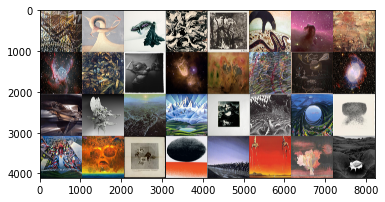

In [18]:
def imshow(inp, title=None):
    """imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
# Get a batch of training data
images = next(iter(train_dl))

# Make a grid from batch
output = torchvision.utils.make_grid(images)

imshow(output)

In [19]:
### - Send data to the correct device - ###
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DDL():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for x in self.dl:
            yield to_device(x, self.device)
    
    def __len__(self):
        return len(self.dl)

trainddl = DDL(train_dl, device)
print(device)

cuda:0
